

# > Convolutional Neural Network Implementation



In [3]:
##Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix


# Loading Data

In [4]:
##Loading and checking the data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


170498071/170498071 [==============================] - 4s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# Visualizing Samples

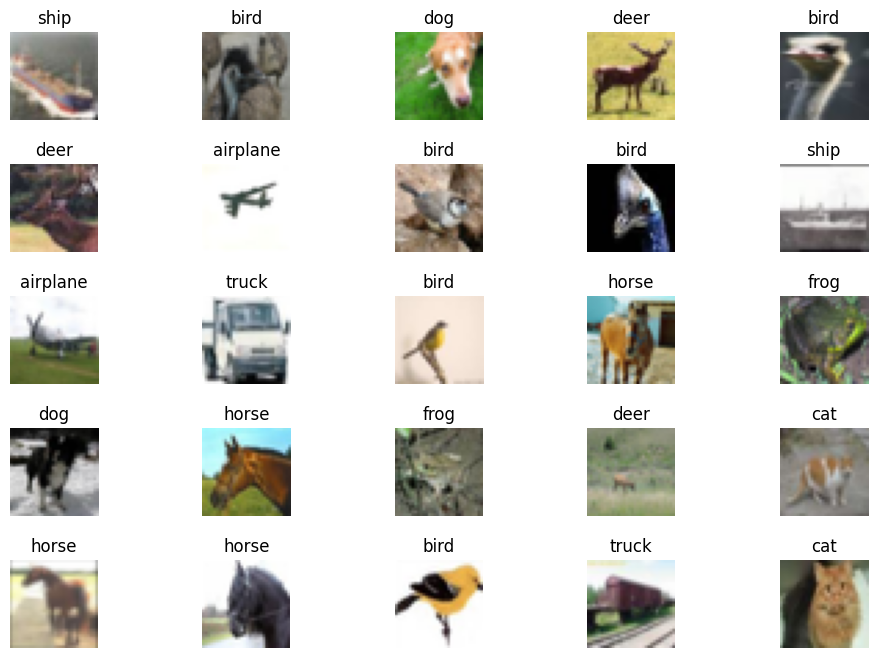

In [5]:
##Visualizing Samples

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(5,5, figsize = (12,8))
axes = axes.ravel()

for i in range(25):
  index = np.random.randint(0,len(X_train))
  axes[i].imshow(X_train[index])
  axes[i].set_title(class_names[y_train[index][0]])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)

# Class Distribution

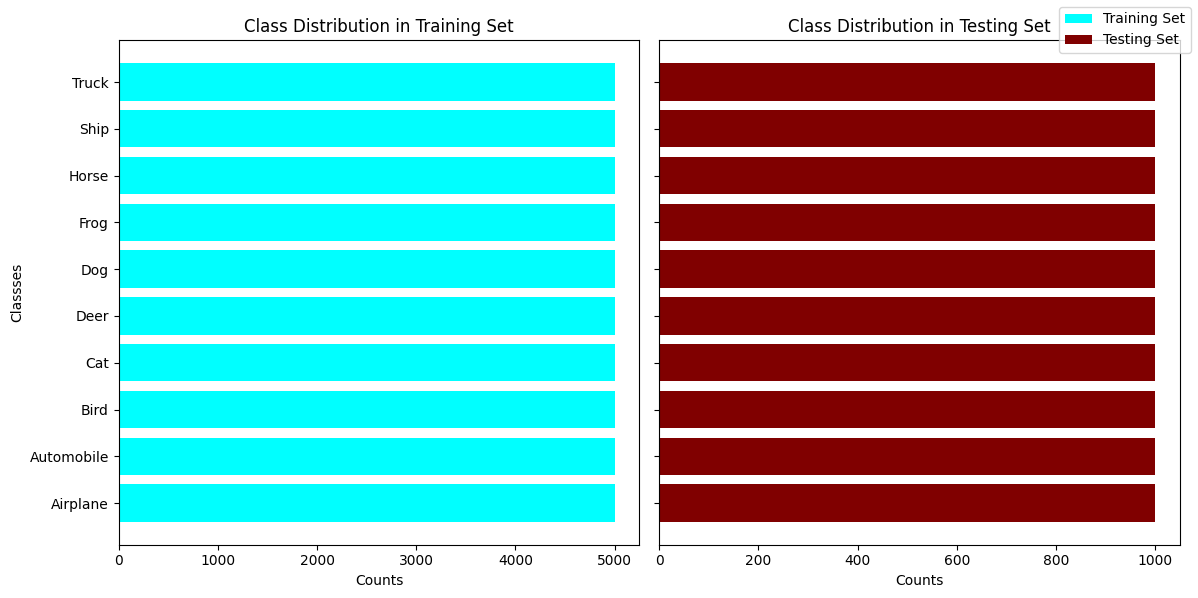

In [6]:
## Checking the class distribution

classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classses, test_counts = np.unique(y_test, return_counts=True)

fig, axs = plt.subplots(1,2, figsize=(12,6), sharey=True)

axs[0].barh(classes_name, train_counts, color = 'cyan')
axs[0].set_title('Class Distribution in Training Set')
axs[0].set_xlabel('Counts')
axs[0].set_ylabel('Classses')

axs[1].barh(classes_name, test_counts, color = 'maroon')
axs[1].set_title('Class Distribution in Testing Set')
axs[1].set_xlabel('Counts')

fig.legend(['Training Set' , 'Testing Set'], loc='upper right')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [7]:
##Normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
##One-Hot Encoding

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

Data Augmentation

In [9]:
##Data Augmentaion

train_datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True, zoom_range=0.1)
train_datagen.fit(X_train)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_cat_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_cat_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


# Model Building

In [10]:
## Model Building

#Starting with a basic model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(16, (3,3), activation = 'relu', input_shape = (32,32,3)),

        #Flattening the output to feed the dense layer
        Flatten(),

        #Output Layer with softmax activation for multi-class classification
        Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 10)                144010    
                                                                 
Total params: 144458 (564.29 KB)
Trainable params: 144458 (564.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 10.0 MB/s eta 0:00:00


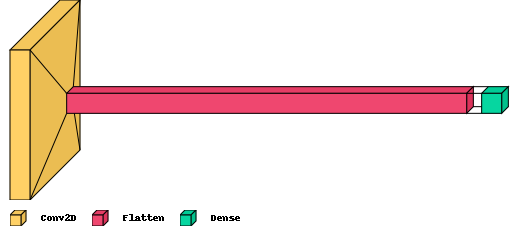

In [12]:
import visualkeras

visualkeras.layered_view(model, spacing = 15, legend=True, scale_xy=5, to_file='output.png')

In [13]:
#Training the Model
history = model.fit(X_train, y_cat_train, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 14s 8ms/step - loss: 1.5343 - accuracy: 0.4597 - val_loss: 1.3713 - val_accuracy: 0.5258
Epoch 2/5
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2502 - accuracy: 0.5651 - val_loss: 1.2544 - val_accuracy: 0.5713
Epoch 3/5
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1272 - accuracy: 0.6123 - val_loss: 1.2542 - val_accuracy: 0.5687
Epoch 4/5
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0359 - accuracy: 0.6418 - val_loss: 1.2136 - val_accuracy: 0.5837
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9663 - accuracy: 0.6673 - val_loss: 1.2159 - val_accuracy: 0.5846


In [14]:
##Defining utility functions to plot Accuracies and Losses

def smooth_curve(points,factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)

  return smoothed_points

def plot_convergence():
  plt.figure(figsize=(10, 5))
  plt.subplot(1,2,1)
  plt.plot(smooth_curve(history.history['accuracy']), marker= 'o', label = 'Train Accuracy')
  plt.plot(smooth_curve(history.history['val_accuracy']), marker= 'o', label = 'Validation Accuracy')
  plt.title('Training and Validation Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(smooth_curve(history.history['loss']),marker = 'o', label = 'Train Loss')
  plt.plot(smooth_curve(history.history['val_loss']),marker = 'o', label = 'Validation Loss')
  plt.title('Training and Validation Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()

def test_model_accuracy(model):
  test_loss,test_accuracy = model.evaluate(X_test, y_cat_test)
  print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
  plot_convergence()



313/313 [==============================] - 1s 2ms/step - loss: 1.2142 - accuracy: 0.5814
Test Accuracy: 58.14%


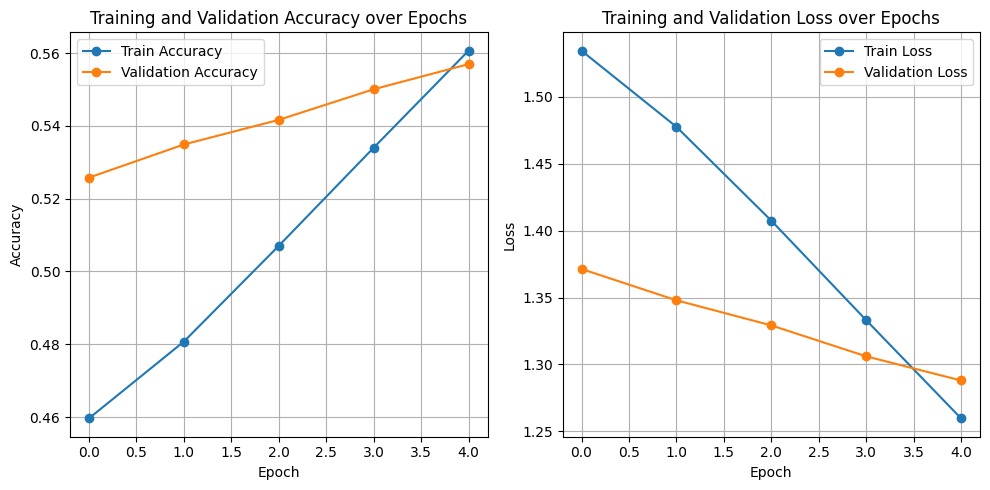

In [15]:
test_model_accuracy(model)

# Increasing Number of Epochs
Testing with more epochs

In [16]:
##Training the model with 15 epochs
history = model.fit(X_train, y_cat_train, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9081 - accuracy: 0.6889 - val_loss: 1.1948 - val_accuracy: 0.5936
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8628 - accuracy: 0.7010 - val_loss: 1.2143 - val_accuracy: 0.5941
Epoch 3/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8155 - accuracy: 0.7205 - val_loss: 1.2707 - val_accuracy: 0.5862
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7770 - accuracy: 0.7329 - val_loss: 1.2508 - val_accuracy: 0.5876
Epoch 5/15
1250/1250 [==============================] - 4s 4ms/step - loss: 0.7390 - accuracy: 0.7466 - val_loss: 1.2819 - val_accuracy: 0.5861
Epoch 6/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7033 - accuracy: 0.7599 - val_loss: 1.2731 - val_accuracy: 0.5934
Epoch 7/15
1250/1250 [==============================] - 6s 4ms/step - loss: 0.6742 - accuracy: 0.7693 - val_loss: 1.2925 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 1.5506 - accuracy: 0.5687
Test Accuracy: 56.87%


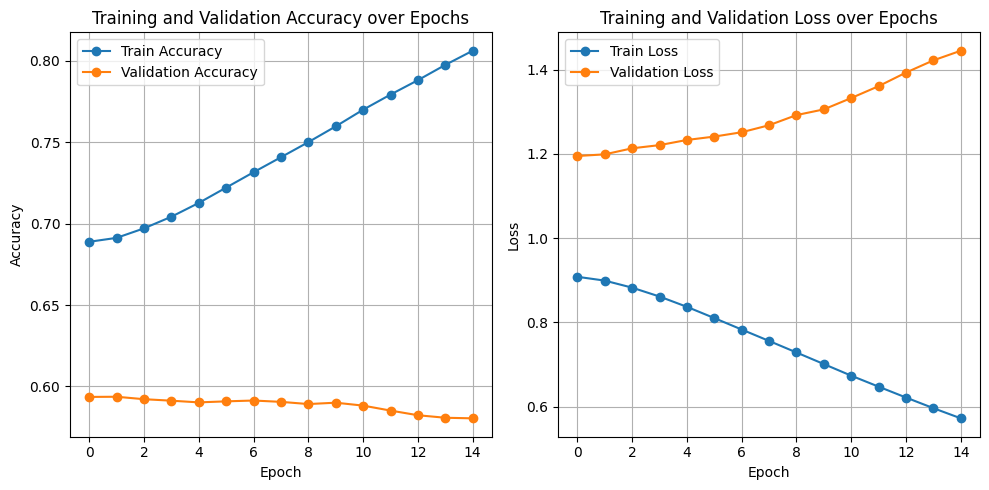

In [17]:
test_model_accuracy(model)

# Increasing Batch Size

In [18]:
history = model.fit(X_train, y_cat_train, epochs=15, validation_split=0.2, batch_size=32)

Epoch 1/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4577 - accuracy: 0.8460 - val_loss: 1.5655 - val_accuracy: 0.5776
Epoch 2/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4343 - accuracy: 0.8548 - val_loss: 1.6611 - val_accuracy: 0.5642
Epoch 3/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4177 - accuracy: 0.8637 - val_loss: 1.6417 - val_accuracy: 0.5743
Epoch 4/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4001 - accuracy: 0.8690 - val_loss: 1.7264 - val_accuracy: 0.5641
Epoch 5/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3802 - accuracy: 0.8755 - val_loss: 1.7364 - val_accuracy: 0.5690
Epoch 6/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3641 - accuracy: 0.8810 - val_loss: 1.7982 - val_accuracy: 0.5647
Epoch 7/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3510 - accuracy: 0.8858 - val_loss: 1.8494 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 2.2336 - accuracy: 0.5461
Test Accuracy: 54.61%


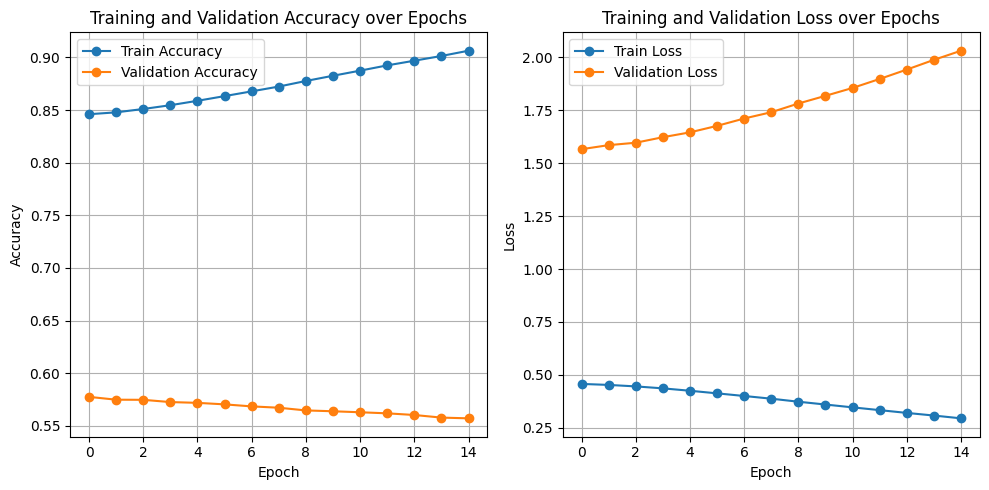

In [19]:
test_model_accuracy(model)

# Adding a Pooling Layer

In [20]:
## Model Building

#Starting with a basic model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(16, (3,3), activation = 'relu', input_shape = (32,32,3)),
        ##Added Pooling Layer
        MaxPooling2D(2,2),

        #Flattening the output to feed the dense layer
        Flatten(),

        #Output Layer with softmax activation for multi-class classification
        Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 3600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                36010     
                                                                 
Total params: 36458 (142.41 KB)
Trainable params: 36458 (142.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


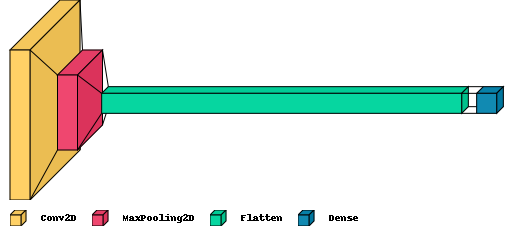

In [21]:
visualkeras.layered_view(model, spacing = 15, legend=True, scale_xy=5, to_file='output.png')

In [22]:
history = model.fit(X_train, y_cat_train, epochs=8, validation_split=0.2, batch_size=32)

Epoch 1/8
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5719 - accuracy: 0.4498 - val_loss: 1.3945 - val_accuracy: 0.5073
Epoch 2/8
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2891 - accuracy: 0.5498 - val_loss: 1.2852 - val_accuracy: 0.5577
Epoch 3/8
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1962 - accuracy: 0.5845 - val_loss: 1.2508 - val_accuracy: 0.5661
Epoch 4/8
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1396 - accuracy: 0.6064 - val_loss: 1.2143 - val_accuracy: 0.5787
Epoch 5/8
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0988 - accuracy: 0.6211 - val_loss: 1.1719 - val_accuracy: 0.5973
Epoch 6/8
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0660 - accuracy: 0.6321 - val_loss: 1.1802 - val_accuracy: 0.5923
Epoch 7/8
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0390 - accuracy: 0.6419 - val_loss: 1.1926 - val_accuracy: 0.5883

313/313 [==============================] - 1s 4ms/step - loss: 1.1957 - accuracy: 0.5841
Test Accuracy: 58.41%


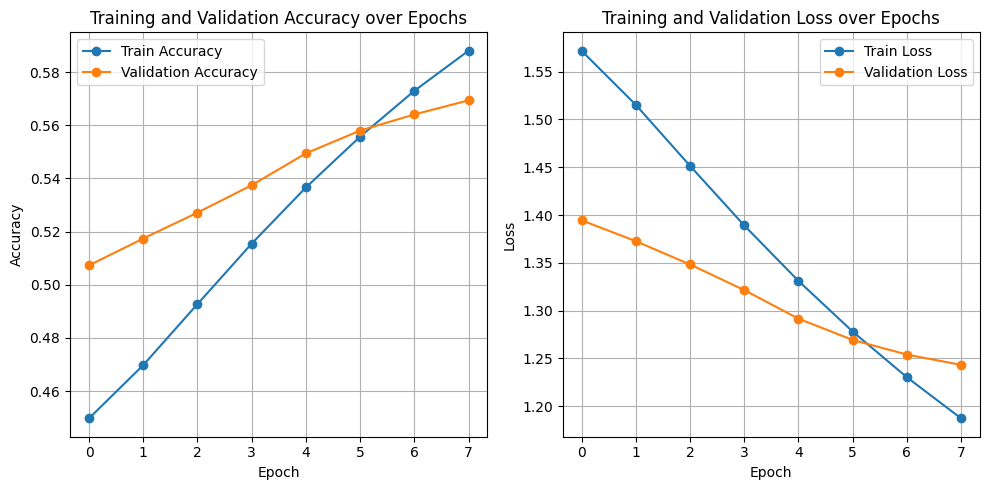

In [23]:
test_model_accuracy(model)

In [24]:
##Pooling layer increased the accuracy and decreased the loss, so testing more epochs
history = model.fit(X_train, y_cat_train, epochs=15, validation_split=0.2, batch_size=32)

Epoch 1/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9975 - accuracy: 0.6569 - val_loss: 1.1895 - val_accuracy: 0.5944
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9792 - accuracy: 0.6628 - val_loss: 1.1509 - val_accuracy: 0.6090
Epoch 3/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9621 - accuracy: 0.6694 - val_loss: 1.1924 - val_accuracy: 0.5925
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9454 - accuracy: 0.6763 - val_loss: 1.1593 - val_accuracy: 0.6022
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9242 - accuracy: 0.6817 - val_loss: 1.1531 - val_accuracy: 0.6081
Epoch 6/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9176 - accuracy: 0.6837 - val_loss: 1.1571 - val_accuracy: 0.6103
Epoch 7/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9034 - accuracy: 0.6917 - val_loss: 1.2165 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 1.1723 - accuracy: 0.6057
Test Accuracy: 60.57%


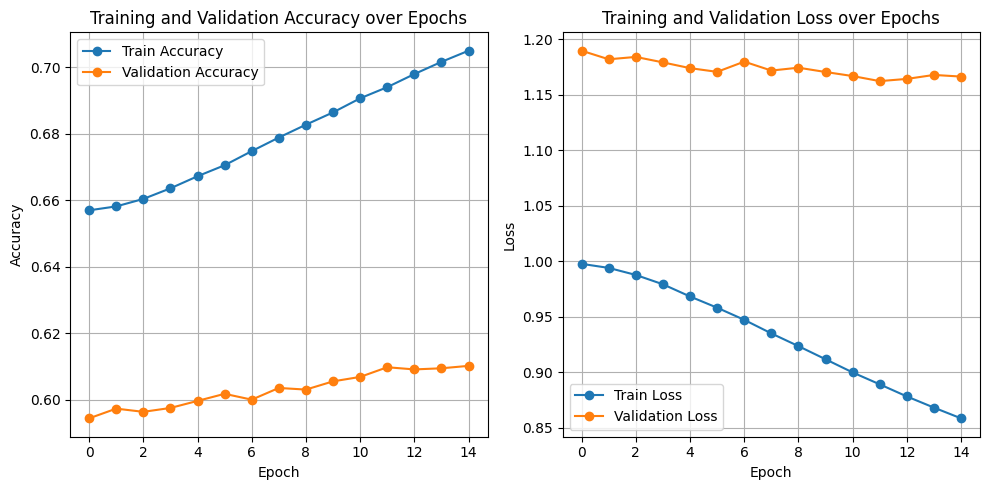

In [25]:
test_model_accuracy(model)

# Batch Normalization

In [26]:
## Model Building

#Starting with a basic model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(16, (3,3), input_shape = (32,32,3)),
        #Added Batch Normalization
        BatchNormalization(),
        Activation('relu'),

        MaxPooling2D(2,2),

        #Flattening the output to feed the dense layer
        Flatten(),

        #Output Layer with softmax activation for multi-class classification
        Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 16)        64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

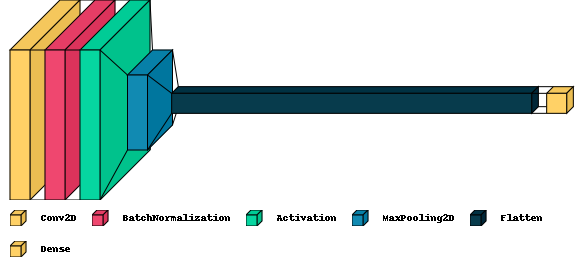

In [27]:
visualkeras.layered_view(model, spacing = 15, legend=True, scale_xy=5, to_file='output.png')

In [28]:
history = model.fit(X_train, y_cat_train, epochs=15, validation_split=0.2, batch_size=32)

Epoch 1/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5148 - accuracy: 0.4783 - val_loss: 2.3738 - val_accuracy: 0.3650
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1820 - accuracy: 0.5902 - val_loss: 1.2255 - val_accuracy: 0.5831
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0838 - accuracy: 0.6290 - val_loss: 1.3724 - val_accuracy: 0.5484
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0285 - accuracy: 0.6437 - val_loss: 1.2459 - val_accuracy: 0.5801
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9921 - accuracy: 0.6586 - val_loss: 1.4248 - val_accuracy: 0.5484
Epoch 6/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9551 - accuracy: 0.6710 - val_loss: 1.5417 - val_accuracy: 0.5228
Epoch 7/15
1250/1250 [==============================] - 4s 4ms/step - loss: 0.9299 - accuracy: 0.6785 - val_loss: 1.2194 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 1.4292 - accuracy: 0.5662
Test Accuracy: 56.62%


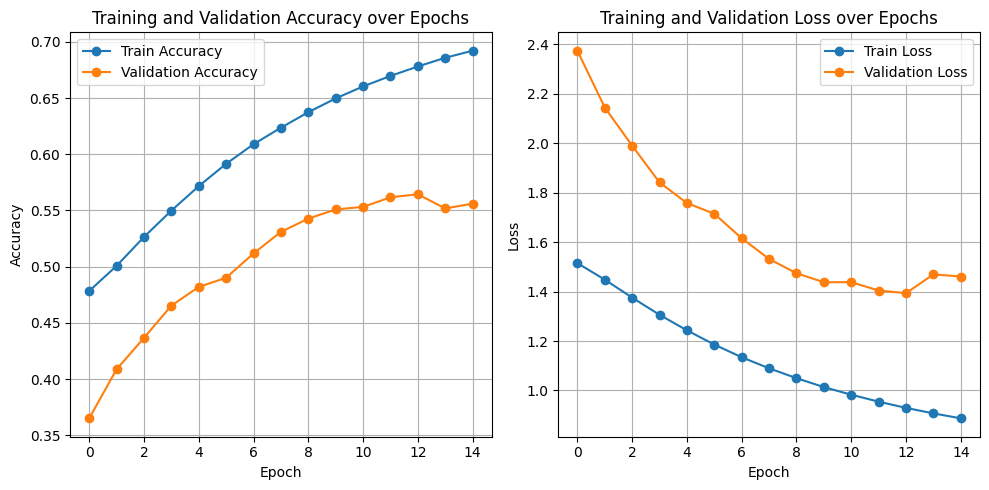

In [29]:
test_model_accuracy(model)

# Adding More Pooling and Convolutional Layers

In [30]:
## Model Building

model = Sequential([
    # Single Convolutional Layer
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    # Flattening the output to feed into a dense layer
    Flatten(),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_2 (Bat  (None, 13, 13, 64)       

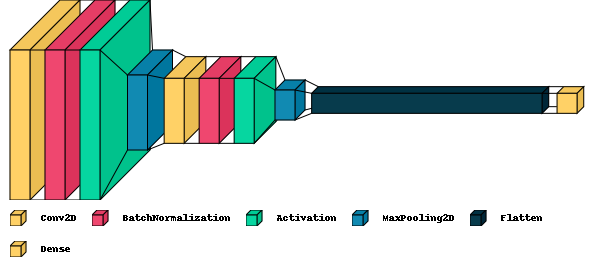

In [31]:
visualkeras.layered_view(model, spacing = 15, legend=True, scale_xy=5, to_file='output.png')

In [32]:
history = model.fit(X_train, y_cat_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 1.3914 - accuracy: 0.5145 - val_loss: 1.4558 - val_accuracy: 0.5210
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0580 - accuracy: 0.6326 - val_loss: 1.2275 - val_accuracy: 0.5814
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9352 - accuracy: 0.6778 - val_loss: 1.0694 - val_accuracy: 0.6258
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8567 - accuracy: 0.7058 - val_loss: 1.2219 - val_accuracy: 0.5814
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7942 - accuracy: 0.7263 - val_loss: 1.0868 - val_accuracy: 0.6281
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7449 - accuracy: 0.7441 - val_loss: 1.4130 - val_accuracy: 0.5716
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7022 - accuracy: 0.7581 - val_loss: 0.8940 - val_accuracy:

313/313 [==============================] - 1s 4ms/step - loss: 1.0539 - accuracy: 0.6680
Test Accuracy: 66.80%


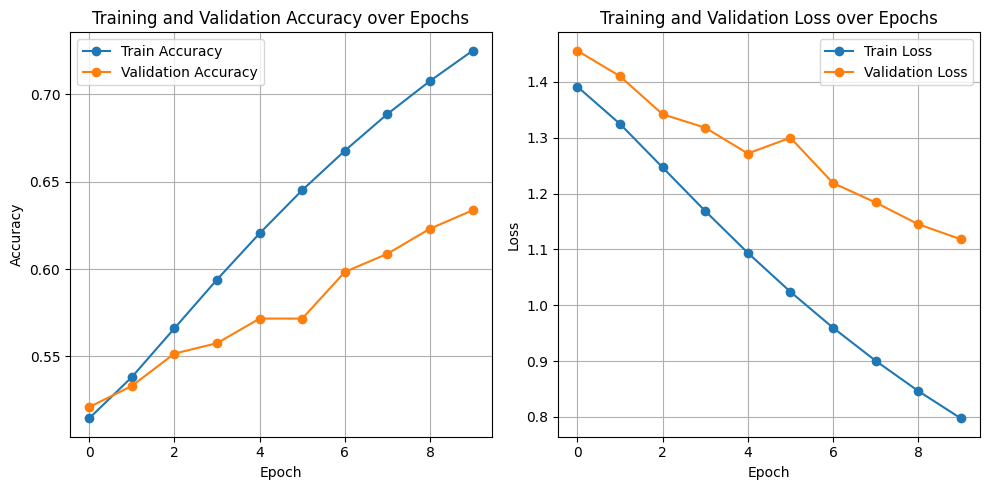

In [33]:
test_model_accuracy(model)

# Adding a Dropout Layer

In [34]:
## Model Building

model = Sequential([
    # Single Convolutional Layer
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Second convolutional layer
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Flattening the output to feed into a dense layer
    Flatten(),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)       

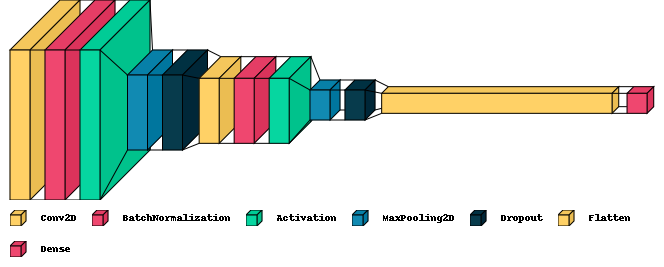

In [35]:
visualkeras.layered_view(model, spacing = 15, legend=True, scale_xy=5, to_file='output.png')

In [36]:
history = model.fit(X_train, y_cat_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 11s 6ms/step - loss: 1.6151 - accuracy: 0.4464 - val_loss: 1.3277 - val_accuracy: 0.5335
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2091 - accuracy: 0.5756 - val_loss: 1.3875 - val_accuracy: 0.5068
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0878 - accuracy: 0.6185 - val_loss: 1.1365 - val_accuracy: 0.6031
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0220 - accuracy: 0.6452 - val_loss: 1.0785 - val_accuracy: 0.6304
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9783 - accuracy: 0.6622 - val_loss: 1.0377 - val_accuracy: 0.6426
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9345 - accuracy: 0.6779 - val_loss: 0.9383 - val_accuracy: 0.6774
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9011 - accuracy: 0.6880 - val_loss: 1.1785 - val_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.9506 - accuracy: 0.6791
Test Accuracy: 67.91%


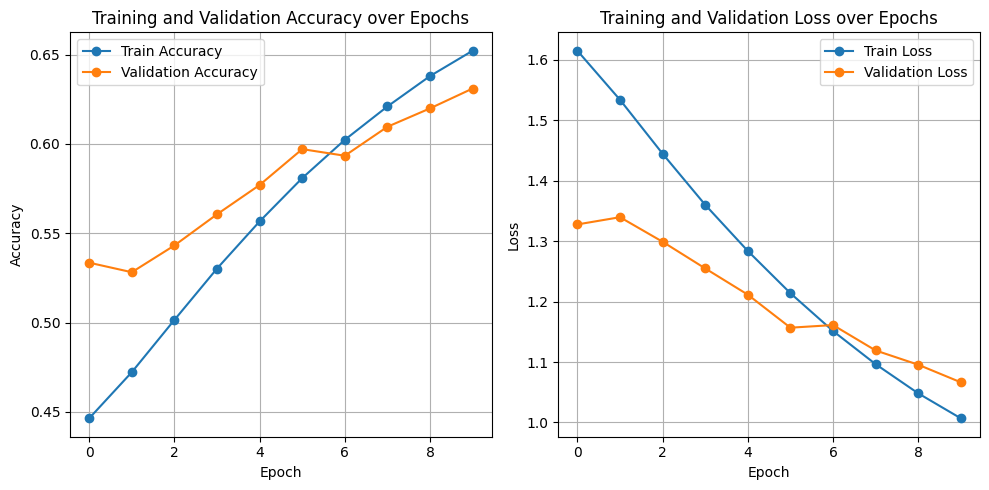

In [37]:
test_model_accuracy(model)

In [38]:
##Adding a dropout layer improved the metrics, testing with 20 epochs
history = model.fit(X_train, y_cat_train, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8241 - accuracy: 0.7144 - val_loss: 1.0137 - val_accuracy: 0.6637
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8138 - accuracy: 0.7180 - val_loss: 0.9447 - val_accuracy: 0.6704
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8006 - accuracy: 0.7247 - val_loss: 1.2354 - val_accuracy: 0.5743
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7924 - accuracy: 0.7239 - val_loss: 0.9411 - val_accuracy: 0.6761
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7799 - accuracy: 0.7311 - val_loss: 0.8764 - val_accuracy: 0.7004
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7739 - accuracy: 0.7313 - val_loss: 0.8610 - val_accuracy: 0.6998
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7607 - accuracy: 0.7366 - val_loss: 0.8306 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 0.8159 - accuracy: 0.7179
Test Accuracy: 71.79%


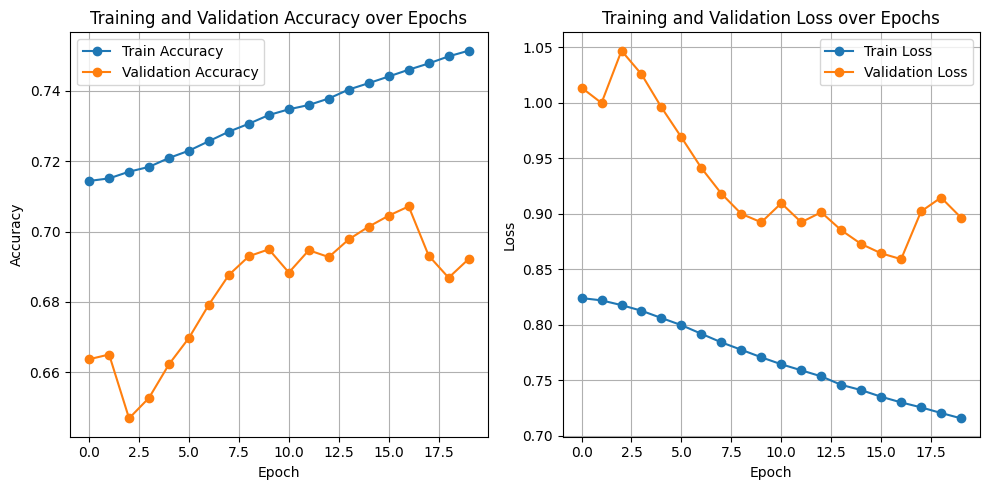

In [39]:
test_model_accuracy(model)

# Early Stopping
As can be seen, there are variations between epochs, hence Early Stopping implemented. It also saves time.

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    min_delta=0.01,      # Minimum change to qualify as an improvement
    mode='min',          # The training will stop when the quantity monitored stops decreasing
    verbose=1            # Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=15,           # Seting a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Including the early stopping callback
)

Epoch 1/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7004 - accuracy: 0.7567 - val_loss: 0.8612 - val_accuracy: 0.7079
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6918 - accuracy: 0.7580 - val_loss: 0.8068 - val_accuracy: 0.7272
Epoch 3/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6865 - accuracy: 0.7606 - val_loss: 0.8189 - val_accuracy: 0.7159
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6870 - accuracy: 0.7619 - val_loss: 0.8652 - val_accuracy: 0.7032
Epoch 5/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6887 - accuracy: 0.7603 - val_loss: 0.9463 - val_accuracy: 0.6711
Epoch 5: early stopping


313/313 [==============================] - 1s 3ms/step - loss: 0.9385 - accuracy: 0.6783
Test Accuracy: 67.83%


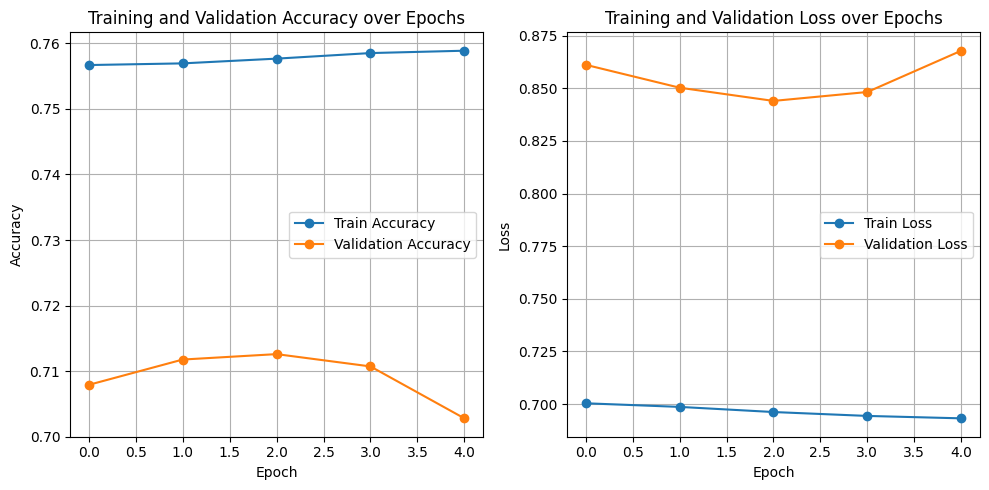

In [41]:
test_model_accuracy(model)

# Adding Dense Layers

In [42]:
## Model Building

model = Sequential([
    # Single Convolutional Layer
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling


    # Second convolutional layer
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Flattening the output to feed into a dense layer
    Flatten(),

    # First Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Additional Dense Layer
    Dense(64, activation='relu'),
    Dropout(0.5),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)       

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  #Monitor validation loss
    patience=3,          #Number of epochs with no improvement after which training will be stopped
    min_delta=0.01,      #Minimum change to qualify as an improvement
    mode='min',          #The training will stop when the quantity monitored stops decreasing
    verbose=1            #Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=15,            # Setting a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Including the early stopping callback
)

Epoch 1/15
1250/1250 [==============================] - 10s 6ms/step - loss: 2.2052 - accuracy: 0.1654 - val_loss: 2.2001 - val_accuracy: 0.1714
Epoch 2/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9851 - accuracy: 0.2352 - val_loss: 2.1120 - val_accuracy: 0.1905
Epoch 3/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8835 - accuracy: 0.2767 - val_loss: 1.7870 - val_accuracy: 0.3439
Epoch 4/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8050 - accuracy: 0.3069 - val_loss: 1.6554 - val_accuracy: 0.4238
Epoch 5/15
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7513 - accuracy: 0.3313 - val_loss: 1.8248 - val_accuracy: 0.3324
Epoch 6/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6876 - accuracy: 0.3570 - val_loss: 1.5770 - val_accuracy: 0.4667
Epoch 7/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6624 - accuracy: 0.3709 - val_loss: 1.4932 - val_accuracy

313/313 [==============================] - 1s 4ms/step - loss: 1.5587 - accuracy: 0.4546
Test Accuracy: 45.46%


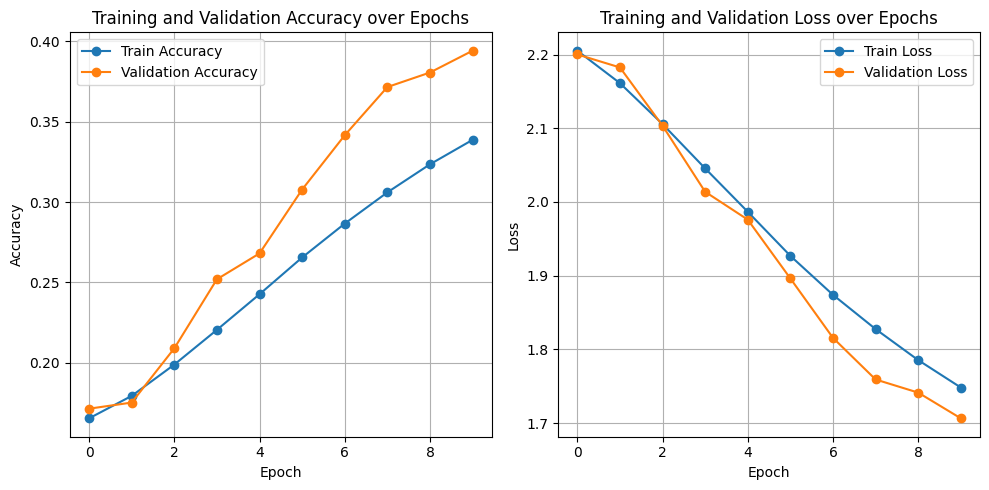

In [44]:
test_model_accuracy(model)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  #Monitor validation loss
    patience=3,          #Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,     #Minimum change to qualify as an improvement
    mode='min',          #The training will stop when the quantity monitored stops decreasing
    verbose=1            #Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=50,          #Setting a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Including the early stopping callback
)

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5824 - accuracy: 0.4128 - val_loss: 1.4628 - val_accuracy: 0.5166
Epoch 2/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5449 - accuracy: 0.4267 - val_loss: 1.3974 - val_accuracy: 0.5268
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5186 - accuracy: 0.4415 - val_loss: 1.4468 - val_accuracy: 0.5147
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4866 - accuracy: 0.4536 - val_loss: 1.4612 - val_accuracy: 0.5076
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4469 - accuracy: 0.4715 - val_loss: 1.3764 - val_accuracy: 0.5583
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4312 - accuracy: 0.4838 - val_loss: 1.3187 - val_accuracy: 0.5693
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4153 - accuracy: 0.4929 - val_loss: 1.2973 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 1.0092 - accuracy: 0.6624
Test Accuracy: 66.24%


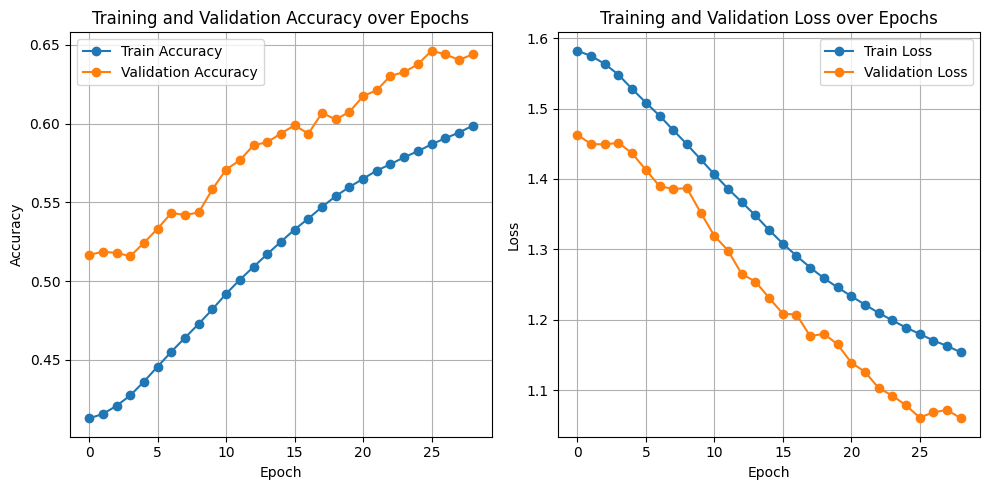

In [46]:
test_model_accuracy(model)

In [47]:
##Adding two dense layer, signifacntly drops the performance ,
##Testing with one dense layer
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    # Single Convolutional Layer
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling


    # Second convolutional layer
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Flattening the output to feed into a dense layer
    Flatten(),

    # First Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.15),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)       

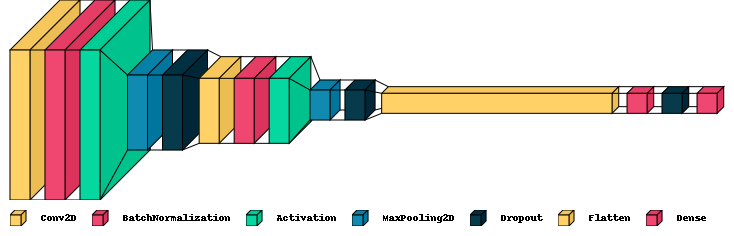

In [48]:
visualkeras.layered_view(model, spacing=15, legend=True, scale_xy=5, to_file='output.png')

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  #Monitor validation loss
    patience=3,          #Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,     #Minimum change to qualify as an improvement
    mode='min',          #The training will stop when the quantity monitored stops decreasing
    verbose=1            #Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=50,  # Set a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/50
1250/1250 [==============================] - 10s 7ms/step - loss: 1.6934 - accuracy: 0.3758 - val_loss: 1.4499 - val_accuracy: 0.4798
Epoch 2/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4137 - accuracy: 0.4791 - val_loss: 1.2650 - val_accuracy: 0.5506
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3203 - accuracy: 0.5169 - val_loss: 1.2152 - val_accuracy: 0.5620
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2492 - accuracy: 0.5494 - val_loss: 1.2029 - val_accuracy: 0.5807
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2009 - accuracy: 0.5669 - val_loss: 1.1287 - val_accuracy: 0.5923
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1596 - accuracy: 0.5836 - val_loss: 1.1590 - val_accuracy: 0.5908
Epoch 7/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1200 - accuracy: 0.6022 - val_loss: 1.0503 - val_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.2963 - accuracy: 0.5711
Test Accuracy: 57.11%


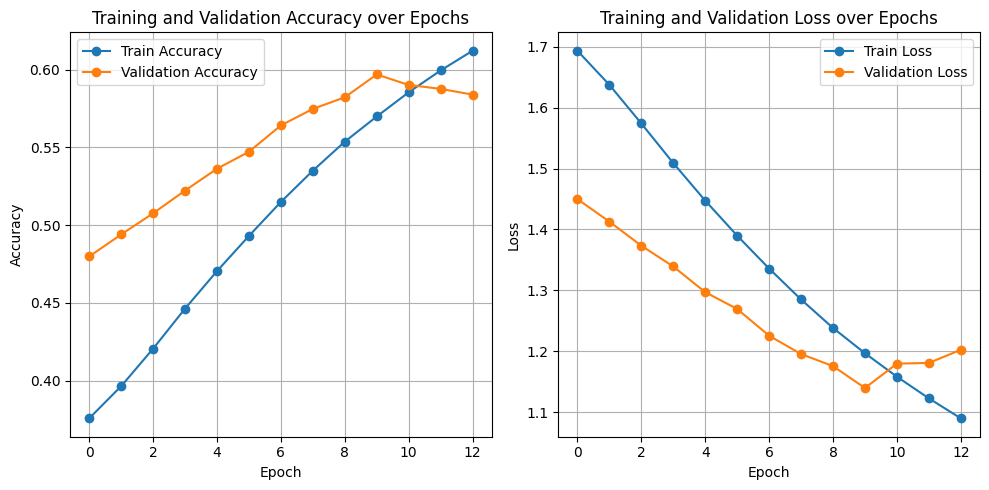

In [50]:
test_model_accuracy(model)

# Activation Functions
Testing with LeakyRelu to prevent neurons from dying

In [51]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    # Single Convolutional Layer
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling


    # Second convolutional layer
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Flattening the output to feed into a dense layer
    Flatten(),

    # First Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.15),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)       

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  #Monitor validation loss
    patience=3,          #Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,     #Minimum change to qualify as an improvement
    mode='min',          #The training will stop when the quantity monitored stops decreasing
    verbose=1            #Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=50,  # Set a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/50
1250/1250 [==============================] - 10s 7ms/step - loss: 1.6066 - accuracy: 0.4123 - val_loss: 1.3268 - val_accuracy: 0.5182
Epoch 2/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3302 - accuracy: 0.5195 - val_loss: 1.4832 - val_accuracy: 0.4578
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2188 - accuracy: 0.5649 - val_loss: 1.1537 - val_accuracy: 0.5959
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1600 - accuracy: 0.5870 - val_loss: 1.3576 - val_accuracy: 0.5482
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1037 - accuracy: 0.6085 - val_loss: 1.0465 - val_accuracy: 0.6473
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0645 - accuracy: 0.6245 - val_loss: 1.4489 - val_accuracy: 0.5234
Epoch 7/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0382 - accuracy: 0.6350 - val_loss: 1.0234 - val_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.0338 - accuracy: 0.6485
Test Accuracy: 64.85%


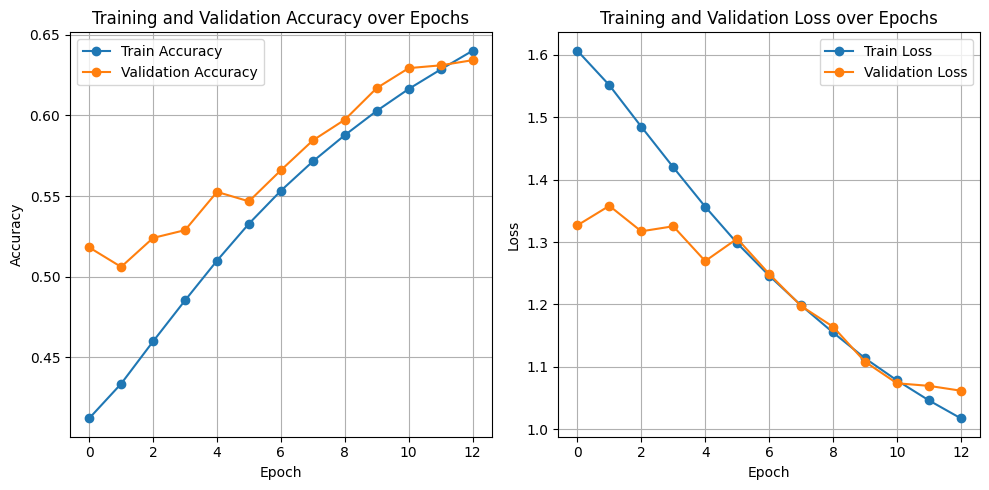

In [53]:
test_model_accuracy(model)

# Changing Learning Rate and Optimizers
Using SGD optimizer with 0.01 learning rate

In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


model = Sequential([
    # Single Convolutional Layer
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling


    # Second convolutional layer
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Flattening the output to feed into a dense layer
    Flatten(),

    # First Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.15),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])


optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,         # Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,    # Minimum change to qualify as an improvement
    mode='min',         # The training will stop when the quantity monitored stops decreasing
    verbose=1           # Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=50,  # Set a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/50
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7344 - accuracy: 0.3627 - val_loss: 1.5190 - val_accuracy: 0.4575
Epoch 2/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4542 - accuracy: 0.4715 - val_loss: 1.2552 - val_accuracy: 0.5682
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3092 - accuracy: 0.5333 - val_loss: 1.2511 - val_accuracy: 0.5570
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2172 - accuracy: 0.5706 - val_loss: 1.3368 - val_accuracy: 0.5322
Epoch 5/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1486 - accuracy: 0.5960 - val_loss: 1.0951 - val_accuracy: 0.6186
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0837 - accuracy: 0.6194 - val_loss: 1.1028 - val_accuracy: 0.6071
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0415 - accuracy: 0.6356 - val_loss: 0.9899 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 1.1069 - accuracy: 0.6182
Test Accuracy: 61.82%


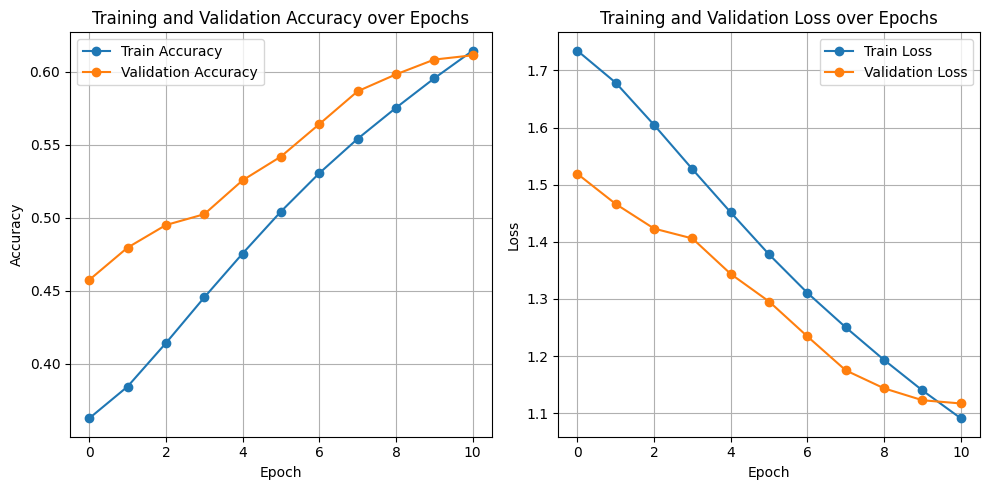

In [55]:
test_model_accuracy(model)

# Adding More Complexity

In [56]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


model = Sequential([
    # Single Convolutional Layer
    Conv2D(64, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Second convolutional layer
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Flattening the output to feed into a dense layer
    Flatten(),

    # First Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.25),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])


optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(
    monitor='val_loss',  #Monitor validation loss
    patience=3,          #Number of epochs with no improvement after which training will be stopped
    min_delta=0.0005,    #Minimum change to qualify as an improvement
    mode='min',          #The training will stop when the quantity monitored stops decreasing
    verbose=1            #Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=32,  # Set a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/32
1250/1250 [==============================] - 15s 10ms/step - loss: 1.8713 - accuracy: 0.2963 - val_loss: 1.5687 - val_accuracy: 0.4129
Epoch 2/32
1250/1250 [==============================] - 13s 11ms/step - loss: 1.5957 - accuracy: 0.4061 - val_loss: 1.4327 - val_accuracy: 0.4972
Epoch 3/32
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3839 - accuracy: 0.4964 - val_loss: 1.0757 - val_accuracy: 0.6277
Epoch 4/32
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1864 - accuracy: 0.5730 - val_loss: 0.9370 - val_accuracy: 0.6691
Epoch 5/32
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0386 - accuracy: 0.6329 - val_loss: 1.2040 - val_accuracy: 0.5900
Epoch 6/32
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9347 - accuracy: 0.6733 - val_loss: 0.8708 - val_accuracy: 0.6961
Epoch 7/32
1250/1250 [==============================] - 12s 9ms/step - loss: 0.8654 - accuracy: 0.6993 - val_loss: 0.7953 - va

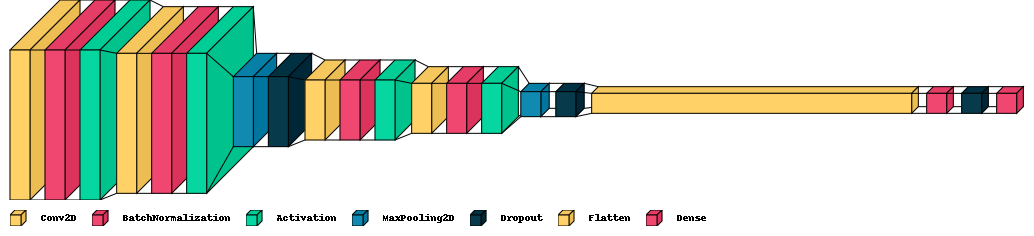

In [57]:
visualkeras.layered_view(model, spacing=15, legend=True, scale_xy=5, to_file='output.png')

313/313 [==============================] - 1s 4ms/step - loss: 0.6870 - accuracy: 0.7690
Test Accuracy: 76.90%


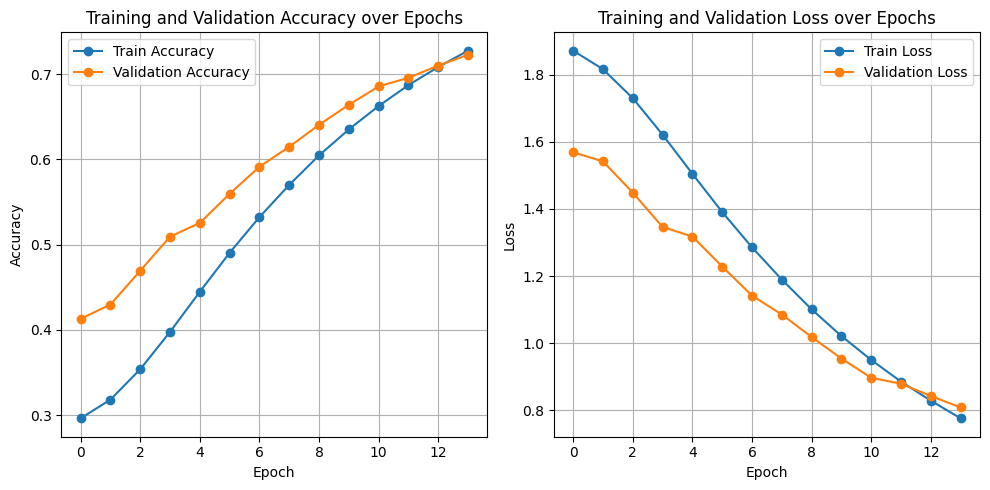

In [58]:
test_model_accuracy(model)

# Changing the Learning Rate

In [61]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


model = Sequential([
    # Single Convolutional Layer
    Conv2D(64, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Second convolutional layer
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling

    # Flattening the output to feed into a dense layer
    Flatten(),

    # First Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.25),

    # Output Layer with softmax activation for multi-class classification
    Dense(10, activation='softmax')
])


optimizer = SGD(learning_rate=0.008, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(
    monitor='val_loss',  #Monitor validation loss
    patience=3,          #Number of epochs with no improvement after which training will be stopped
    min_delta=0.0005,    #Minimum change to qualify as an improvement
    mode='min',          #The training will stop when the quantity monitored stops decreasing
    verbose=1            #Print messages when early stopping is triggered
)

history = model.fit(
    X_train, y_cat_train,
    epochs=32,  # Set a high number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/32
1250/1250 [==============================] - 15s 9ms/step - loss: 1.7450 - accuracy: 0.3555 - val_loss: 1.5776 - val_accuracy: 0.4387
Epoch 2/32
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4296 - accuracy: 0.4883 - val_loss: 1.3268 - val_accuracy: 0.5168
Epoch 3/32
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2230 - accuracy: 0.5644 - val_loss: 1.1754 - val_accuracy: 0.5906
Epoch 4/32
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0746 - accuracy: 0.6227 - val_loss: 0.9744 - val_accuracy: 0.6636
Epoch 5/32
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9667 - accuracy: 0.6635 - val_loss: 0.8416 - val_accuracy: 0.6997
Epoch 6/32
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8959 - accuracy: 0.6888 - val_loss: 0.9044 - val_accuracy: 0.6790
Epoch 7/32
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8169 - accuracy: 0.7160 - val_loss: 0.7702 - val_

313/313 [==============================] - 1s 4ms/step - loss: 0.6626 - accuracy: 0.7914
Test Accuracy: 79.14%


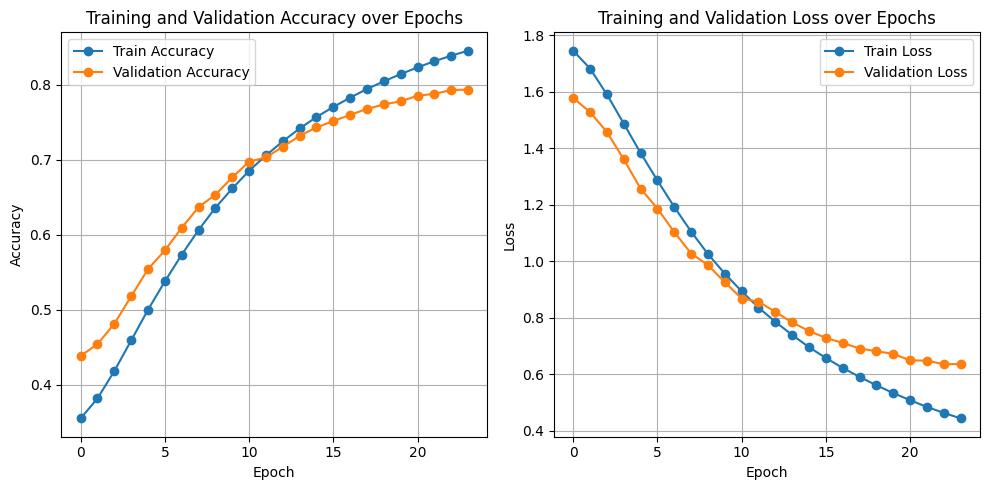

In [62]:
test_model_accuracy(model)

# Saving the Model

In [63]:
from tensorflow.keras.models import load_model

model.save('cnn_20_epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
model2 = load_model('cnn_20_epochs.h5')

In [65]:
model2.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[4.42698423e-04, 5.87498129e-04, 4.23245551e-03, ...,
        1.12209724e-04, 2.39616929e-04, 2.57601758e-04],
       [7.63807236e-07, 2.83382315e-06, 2.85236548e-12, ...,
        2.54894131e-12, 9.99996185e-01, 2.33907699e-07],
       [7.96909153e-04, 1.51946195e-04, 1.92310651e-07, ...,
        2.59131497e-07, 9.98867273e-01, 1.79093928e-04],
       ...,
       [7.59015211e-06, 2.09734808e-05, 6.02605473e-03, ...,
        2.57096486e-03, 9.05822308e-05, 6.46636981e-05],
       [1.95370261e-02, 7.25199819e-01, 1.07744255e-03, ...,
        5.19966823e-04, 3.41545604e-03, 1.85529634e-01],
       [8.97160035e-09, 2.42832837e-11, 4.47514623e-07, ...,
        9.99538302e-01, 1.33849728e-11, 1.63606920e-10]], dtype=float32)

# Evaluation of the Model

313/313 [==============================] - 1s 4ms/step - loss: 0.6626 - accuracy: 0.7914
Test Accuracy : 79.14%
313/313 [==============================] - 1s 3ms/step


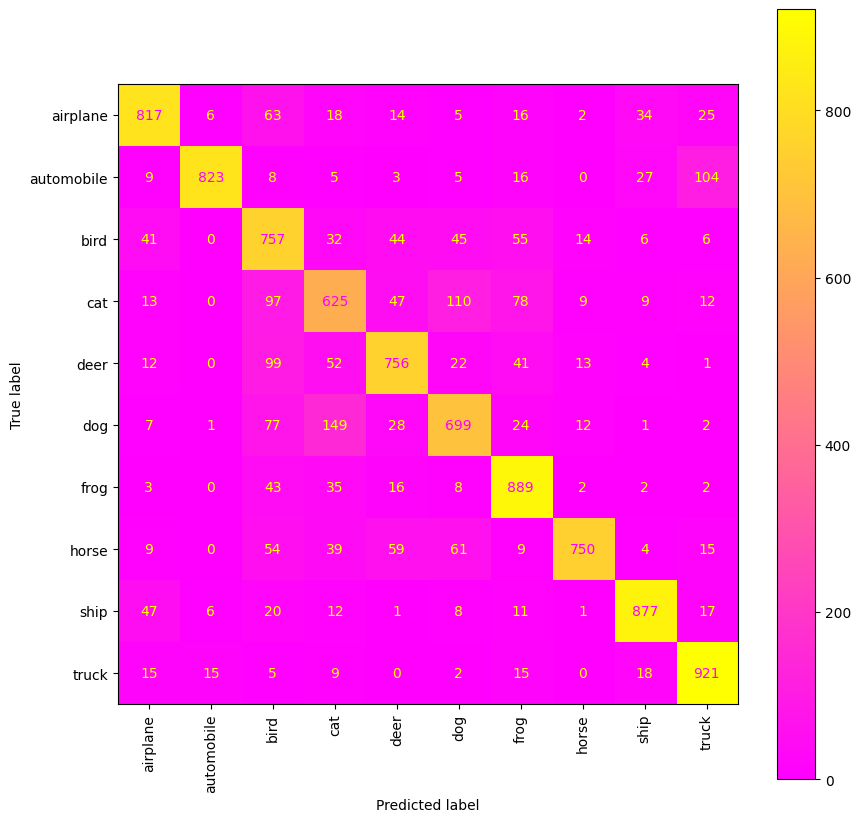

In [66]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='spring')

plt.show()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.97      0.82      0.89      1000
           2       0.62      0.76      0.68      1000
           3       0.64      0.62      0.63      1000
           4       0.78      0.76      0.77      1000
           5       0.72      0.70      0.71      1000
           6       0.77      0.89      0.83      1000
           7       0.93      0.75      0.83      1000
           8       0.89      0.88      0.88      1000
           9       0.83      0.92      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



# Testing against the images from the test set

 Image 31 is [5]
1/1 [==============================] - 0s 391ms/step
The model predict that image 31 is dog


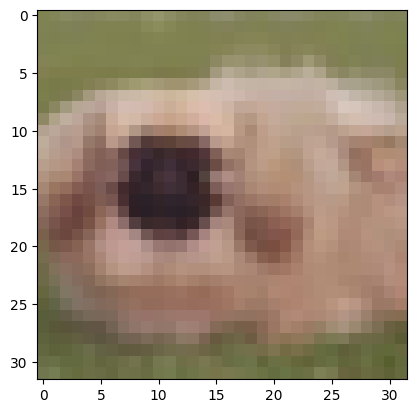

In [68]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

my_image = X_test[31]
plt.imshow(my_image)

print(f" Image 31 is {y_test[31]}")

pred_31 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 31 is {labels[pred_31]}")

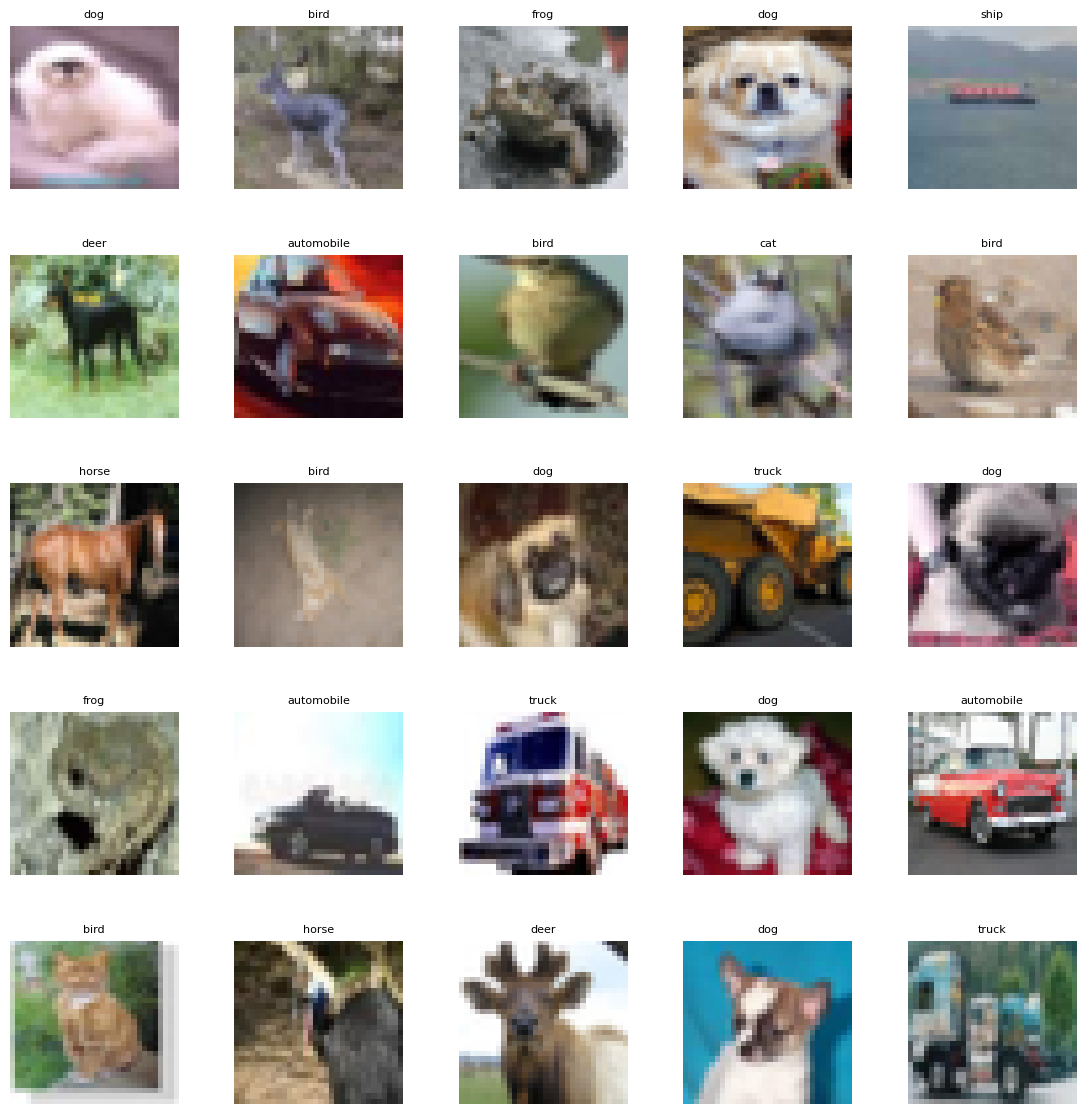

In [69]:
##Testing against images from test set
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (14,14))

axes = axes.ravel()

n_test = len(X_test)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [70]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


<ipython-input-71-6f32f7930c16>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
<ipython-input-71-6f32f7930c16>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


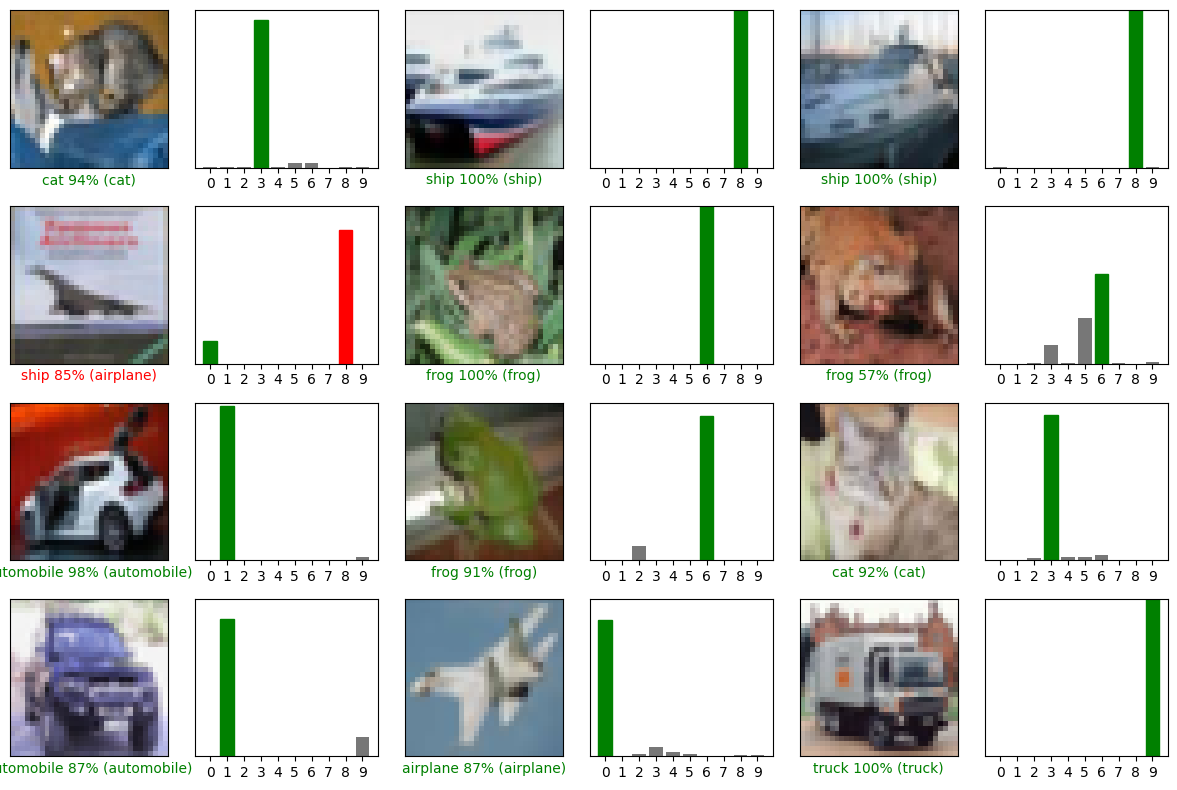

In [71]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

num_rows = 4
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()